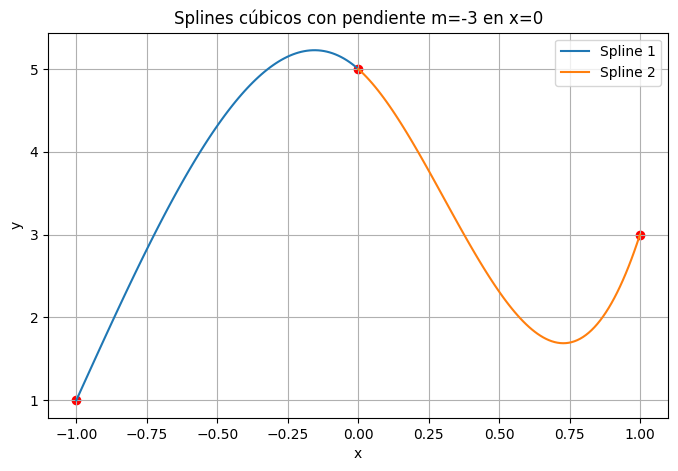

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#puntos que me dan
xs = [-1, 0, 1]
ys = [1, 5, 3]

m = -3


h0 = xs[1] - xs[0]
h1 = xs[2] - xs[1]


from numpy.linalg import solve

A = np.array([
    # S0(x0) = y0
    [1, 0, 0, 0, 0, 0, 0, 0],
    # S0(x1) = y1
    [1, h0, h0**2, h0**3, 0, 0, 0, 0],
    # S1(x1) = y1
    [0, 0, 0, 0, 1, 0, 0, 0],
    # S1(x2) = y2
    [0, 0, 0, 0, 1, h1, h1**2, h1**3],
    # S0'(x1) = m
    [0, 1, 2*h0, 3*h0**2, 0, 0, 0, 0],
    # S1'(x1) = m
    [0, 0, 0, 0, 0, 1, 0, 0],
    # S0''(x1) = S1''(x1)
    [0, 0, 2, 6*h0, 0, 0, -2, 0],
    # S0''(x0) = 0 (condición natural)
    [0, 0, 2, 0, 0, 0, 0, 0],
])

b = np.array([
    ys[0],
    ys[1],
    ys[1],
    ys[2],
    m,
    m,
    0,
    0,
])

sol = solve(A, b)

# Coeficientes
pars0 = {"a": sol[0], "b": sol[1], "c": sol[2], "d": sol[3]}
pars1 = {"a": sol[4], "b": sol[5], "c": sol[6], "d": sol[7]}

# Spline cúbico
def Spline(x, x0, pars):
    return pars["a"] + pars["b"]*(x-x0) + pars["c"]*(x-x0)**2 + pars["d"]*(x-x0)**3

plt.figure(figsize=(8,5))
_x0 = np.linspace(xs[0], xs[1], 100)
_x1 = np.linspace(xs[1], xs[2], 100)
plt.plot(_x0, Spline(_x0, xs[0], pars0), label="Spline 1")
plt.plot(_x1, Spline(_x1, xs[1], pars1), label="Spline 2")
plt.scatter(xs, ys, color='red')
plt.title("Splines cúbicos con pendiente m=-3 en x=0")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
print(f"S0(x) = {pars0['d']:.4f}*(x - {xs[0]})**3 + {pars0['c']:.4f}*(x - {xs[0]})**2 + {pars0['b']:.4f}*(x - {xs[0]}) + {pars0['a']:.4f}")
print(f"S1(x) = {pars1['d']:.4f}*(x - {xs[1]})**3 + {pars1['c']:.4f}*(x - {xs[1]})**2 + {pars1['b']:.4f}*(x - {xs[1]}) + {pars1['a']:.4f}")

S0(x) = -3.5000*(x - -1)**3 + 0.0000*(x - -1)**2 + 7.5000*(x - -1) + 1.0000
S1(x) = 11.5000*(x - 0)**3 + -10.5000*(x - 0)**2 + -3.0000*(x - 0) + 5.0000
